In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict

import PIL
from hashlib import md5


import numpy as np
import pandas as pd
import tensorflow as tf
from pathlib import Path


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical



## Load the data

In [2]:
pwd

'/Users/saramaras/Documents/github/kitchenware_classification'

In [3]:
ls

LICENSE            data/              kitchenware.ipynb
README.md          images/


In [4]:
 #base structure
project_dir = Path('/Users/saramaras/Documents/github/kitchenware_classification')
img_dir = project_dir / 'images'


# new structure
dataset_dir = Path('/Users/saramaras/Documents/github/kitchenware_classification/data')


train_dir= dataset_dir /'train'
test_dir = dataset_dir / 'test'
train_data = dataset_dir / 'train.csv'
test_data = dataset_dir / 'test.csv'



In [5]:
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)


In [6]:
train_df.head()

,Id,label
0,560,glass
1,4675,cup
2,875,glass
3,4436,spoon
4,8265,plate


In [7]:
# Map the labels with the photos

In [8]:
train_df['filename'] = train_df['Id'].apply(lambda x: f"{x:04d}.jpg")

In [9]:
test_df['filename'] = test_df['Id'].apply(lambda x: f"{x:04d}.jpg")

In [10]:
train_df.head()

,Id,label,filename
0,560,glass,0560.jpg
1,4675,cup,4675.jpg
2,875,glass,0875.jpg
3,4436,spoon,4436.jpg
4,8265,plate,8265.jpg


In [11]:
test_df

,Id,filename
0,678,0678.jpg
1,3962,3962.jpg
2,9271,9271.jpg
3,5133,5133.jpg
4,8842,8842.jpg
...,...,...
3803,7626,7626.jpg
3804,2052,2052.jpg
3805,8827,8827.jpg
3806,2299,2299.jpg


## Checking duplicate images

In [12]:
hash_dict = defaultdict(list)
for image in img_dir.glob('*.jpg'):
    with image.open('rb') as f:
        img_hash = md5(f.read()).hexdigest() # what is this doing
        hash_dict[img_hash].append(image)
len(hash_dict)

9361

In [13]:
duplicate_img = []
for k, v in hash_dict.items():
    if len(v) > 1:
        if v[0].name != v[1].name:
            duplicate_img.append(v[0])
            duplicate_img.append(v[1])
            print(v)
len(duplicate_img)

[PosixPath('/Users/saramaras/Documents/github/kitchenware_classification/images/7469.jpg'), PosixPath('/Users/saramaras/Documents/github/kitchenware_classification/images/6624.jpg')]
[PosixPath('/Users/saramaras/Documents/github/kitchenware_classification/images/4162.jpg'), PosixPath('/Users/saramaras/Documents/github/kitchenware_classification/images/3458.jpg')]
[PosixPath('/Users/saramaras/Documents/github/kitchenware_classification/images/6833.jpg'), PosixPath('/Users/saramaras/Documents/github/kitchenware_classification/images/8532.jpg')]
[PosixPath('/Users/saramaras/Documents/github/kitchenware_classification/images/7196.jpg'), PosixPath('/Users/saramaras/Documents/github/kitchenware_classification/images/7063.jpg')]
[PosixPath('/Users/saramaras/Documents/github/kitchenware_classification/images/0237.jpg'), PosixPath('/Users/saramaras/Documents/github/kitchenware_classification/images/4234.jpg')]
[PosixPath('/Users/saramaras/Documents/github/kitchenware_classification/images/5428.

12

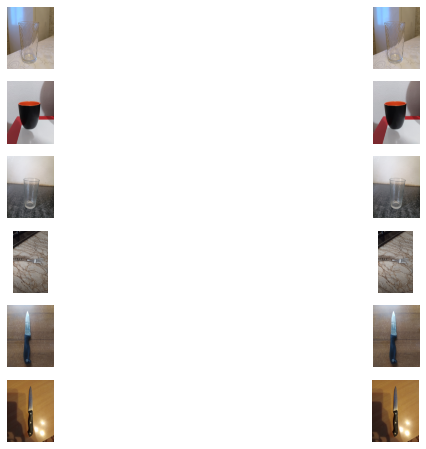

In [14]:
plt.figure(figsize=(12,8))

for idx, img in enumerate(duplicate_img):
    im = PIL.Image.open(img)
    plt.subplot(6,2, idx+1)
    plt.imshow(im)
    plt.axis('off')
plt.show()


### Create directory structure

In [16]:
test_dir.mkdir(parents=True, exist_ok=True)
for label in train_df.label.unique():
    d = train_dir / label
    d.mkdir(parents=True, exist_ok=True)

In [ ]:
## Move the images

In [17]:
images = list(img_dir.glob('*.jpg'))
print(f'Found: {len(images)} images')

Found: 9367 images


In [18]:
count = 0

for img in train_df.filename.to_list():
    label = train_df[train_df.filename == img].label.values[0]
    img_path = img_dir / img
    new_path = train_dir.absolute() / label / img
    if not new_path.exists():
        try: 
            new_path.write_bytes(img_path.read_bytes())
            count += 1
        except FileNotFoundError:
            pass
print(f'Total moved: {count}')
        

Total moved: 5559


In [19]:
count = 0
for img in test_df.filename.to_list():
    img_path = img_dir / img
    new_path = test_dir.absolute() / img
    if not new_path.exists():
        try:
            new_path.write_bytes(img_path.read_bytes())
            count += 1
        except FileNotFoundError:
            pass
print(f'Total moved: {count}')

Total moved: 3808


# Transfer Learning


# Import images 